## Validation Data

In [17]:
import os
import pandas as pd
import torch
from pathlib import Path
from tqdm import tqdm
import glob

names = ["synthetic", "karate", "airports", "facebook", "actor", "wiki"]
#names = ["karate", "airports", "facebook", "actor", "wiki"]

rw_metrics = {}

for name in tqdm(names):
    if name == "synthetic":
        continue
    data_file = Path(f"../data/validation/{name}/raw/0.pt")
    data = torch.load(data_file)
    rw_metrics[name] = data.metrics

metrics = []
settings = []


for name in tqdm(names):
    data_dir = Path(f"../data/validation/{name}/raw")
    data_files = os.listdir(data_dir)
    data_files = glob.glob(f"{data_dir}/*.pt")

    for data_file in tqdm(data_files):
        data = torch.load(data_file)
        if name == "synthetic":
            metrics.append(data.metrics)
        else:
            metrics.append(rw_metrics[name])
        settings.append(data.settings)
        if name != "synthetic":
            data.settings["graph_type"] = name

df_metrics = pd.DataFrame(metrics)
df_settings = pd.DataFrame(settings)
df_metrics.to_csv("metrics.csv")
df_settings.to_csv("settings.csv")

df_settings = pd.read_csv("settings.csv")
df_metrics = pd.read_csv("metrics.csv")
df_metrics = df_metrics.drop(columns=["Unnamed: 0"])
rw_metrics = df_metrics.join(df_settings)

# df_metrics = pd.concat([df_metrics, rw_metrics], axis=0)
rw_metrics["percentages_infected"] = rw_metrics["currently_infected"] / rw_metrics["n_nodes"]
rw_metrics


100%|██████████| 6/6 [00:00<00:00,  6.12it/s]


,diameter,average_shortest_path_length,average_clustering_coefficient,average_degree,n_nodes,n_edges,avg_degree_centrality,Unnamed: 0,graph_type,neighbours,prob_reconnect,beta,threshold_infected,iterations,percentage_initially_infected,currently_infected,percentages_infected
0,4,2.688346,0.050638,15.879586,1063,8440,0.014953,0,barabasi_albert,8,0.090871,0.006433,0.266242,23,0.016874,311,0.292568
1,4,2.745477,0.047602,13.899898,979,6804,0.014213,1,barabasi_albert,7,0.099185,0.006297,0.349247,33,0.015349,379,0.387130
2,5,3.486850,0.423602,14.000000,1020,7140,0.013739,2,watts_strogatz,15,0.079348,0.006393,0.261147,50,0.017312,263,0.257843
3,5,3.305958,0.425084,16.000000,1040,8320,0.015399,3,watts_strogatz,17,0.080453,0.006482,0.321898,42,0.015458,355,0.341346
4,4,2.725604,0.048744,13.893362,919,6384,0.015134,4,barabasi_albert,7,0.076940,0.006766,0.284216,34,0.015426,297,0.323177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,9,3.651620,0.383466,9.836232,2357,11592,0.004175,695,wiki,-1,-1.000000,0.006614,0.256111,40,0.016137,645,0.273653
696,9,3.651620,0.383466,9.836232,2357,11592,0.004175,696,wiki,-1,-1.000000,0.006378,0.321141,42,0.015753,811,0.344081
697,9,3.651620,0.383466,9.836232,2357,11592,0.004175,697,wiki,-1,-1.000000,0.006610,0.305371,43,0.017562,789,0.334748
698,9,3.651620,0.383466,9.836232,2357,11592,0.004175,698,wiki,-1,-1.000000,0.006764,0.345185,47,0.015342,857,0.363598


In [18]:
rw_metrics.groupby(['graph_type']).mean()

,diameter,average_shortest_path_length,average_clustering_coefficient,average_degree,n_nodes,n_edges,avg_degree_centrality,Unnamed: 0,neighbours,prob_reconnect,beta,threshold_infected,iterations,percentage_initially_infected,currently_infected,percentages_infected
graph_type,,,,,,,,,,,,,,,,
actor,12.000000,4.110280,0.080193,7.015526,7600.000000,26659.000000,0.000923,549.500000,-1.000000,-1.000000,0.006511,0.303764,47.480000,0.016047,2320.550000,0.305336
airports,5.000000,2.323611,0.539272,30.040100,399.000000,5993.000000,0.075478,349.500000,-1.000000,-1.000000,0.006511,0.303764,16.400000,0.016047,146.620000,0.367469
barabasi_albert,4.010309,2.705908,0.051190,14.958959,1005.783505,7547.515464,0.014886,98.835052,7.536082,0.086907,0.006503,0.297684,31.536082,0.015749,333.711340,0.331569
facebook,8.000000,3.692507,0.605547,43.691013,4039.000000,88234.000000,0.010820,449.500000,-1.000000,-1.000000,0.006511,0.303764,13.660000,0.016047,1431.050000,0.354308
karate,5.000000,2.408200,0.570638,4.588235,34.000000,78.000000,0.139037,249.500000,-1.000000,-1.000000,0.006511,0.303764,49.640000,0.016047,3.540000,0.104118
watts_strogatz,5.038835,3.332754,0.399618,15.106796,1006.184466,7628.834951,0.015022,100.126214,15.669903,0.087064,0.006538,0.307181,44.058252,0.016168,324.407767,0.321638
wiki,9.000000,3.651620,0.383466,9.836232,2357.000000,11592.000000,0.004175,649.500000,-1.000000,-1.000000,0.006511,0.303764,41.150000,0.016047,759.850000,0.322380


/tmp/ipykernel_3558186/3707963841.py:32: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


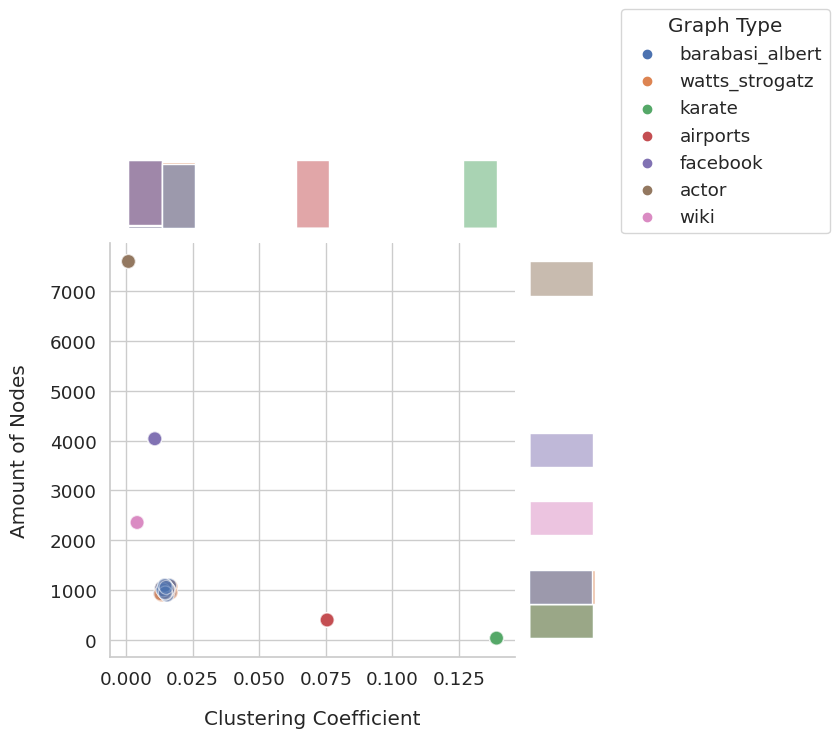

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g1 = sns.JointGrid(
    data=rw_metrics, 
    x="avg_degree_centrality", 
    # x="diameter", 
    #x="average_shortest_path_length", 
    y="n_nodes", 
    # x="n_edges", 
    hue="graph_type"
)

g1.plot_joint(sns.scatterplot, s=100, alpha=.5)
g1.plot_marginals(sns.histplot)
# Customize the plot
g1.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g1.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g1.set_axis_labels("Clustering Coefficient", "Amount of Nodes", labelpad=15)

sns.move_legend(g1.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_3558186/3352416108.py:33: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


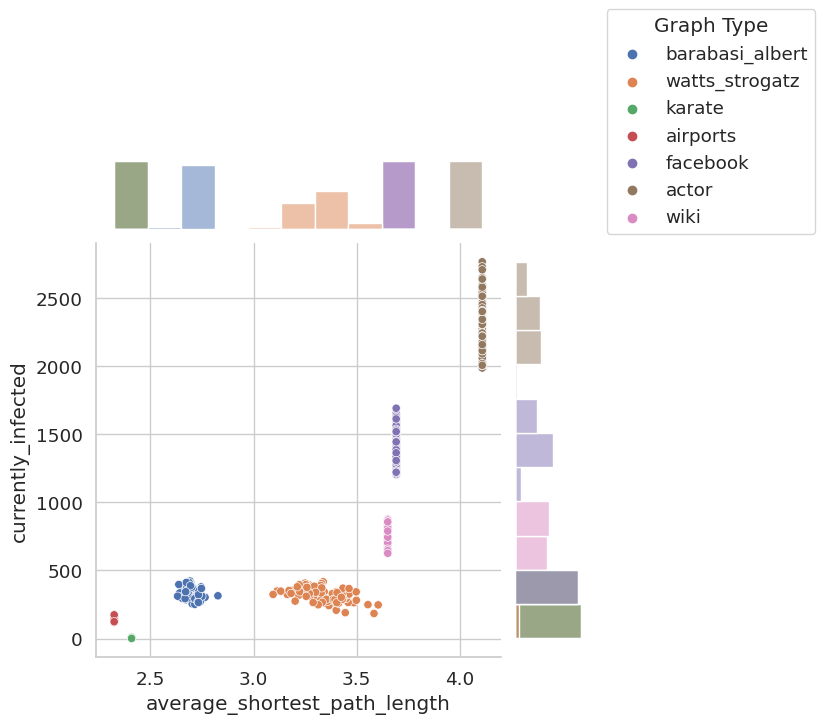

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g = sns.JointGrid(
    data=rw_metrics, 
    # x="average_clustering_coefficient", 
    # x="avg_degree_centrality", 
    x="average_shortest_path_length", 
    y="currently_infected", 
    #y="n_nodes",
    hue="graph_type",
)
#color dots red
g.plot_joint(sns.scatterplot)
#plot histogram on x-axis
g.plot_marginals(sns.histplot)

# Customize the plot
g.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
#g.set_axis_labels("Clustering Coefficient", "Percentage Infected", labelpad=15)
sns.move_legend(g.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

## Training Data:

In [21]:
# iterate over every data object in the data/training/synthetic/raw folder
import os
import pandas as pd
import torch
from pathlib import Path
from tqdm import tqdm
import glob

data_dir = Path("../data/training/synthetic/raw")
data_files = os.listdir(data_dir)
data_files = glob.glob(f"{data_dir}/*.pt")

# create a list of dictionaries to store the data
metrics = []
settings = []

for data_file in tqdm(data_files):
    data = torch.load(data_file)
    metrics.append(data.metrics)
    settings.append(data.settings)
df_metrics = pd.DataFrame(metrics)
df_settings = pd.DataFrame(settings)
df_metrics.to_csv("metrics.csv")
df_settings.to_csv("settings.csv")

df_settings = pd.read_csv("settings.csv")
df_metrics = pd.read_csv("metrics.csv")
df_metrics = df_metrics.drop(columns=["Unnamed: 0"])
df_metrics = df_metrics.join(df_settings)

# df_metrics = pd.concat([df_metrics, rw_metrics], axis=0)
df_metrics["percentages_infected"] = df_metrics["currently_infected"] / df_metrics["n_nodes"]
df_metrics


100%|██████████| 1000/1000 [00:00<00:00, 1342.47it/s]


,diameter,average_shortest_path_length,average_clustering_coefficient,average_degree,n_nodes,n_edges,avg_degree_centrality,Unnamed: 0,graph_type,neighbours,prob_reconnect,beta,threshold_infected,iterations,percentage_initially_infected,currently_infected,percentages_infected
0,4,2.662330,0.055850,15.872383,1003,7960,0.015841,0,barabasi_albert,8,0.076613,0.006257,0.277356,28,0.014646,309,0.308076
1,6,3.524085,0.428834,14.000000,1044,7308,0.013423,1,watts_strogatz,15,0.076366,0.006211,0.344858,50,0.015955,386,0.369732
2,5,3.250807,0.412813,16.000000,964,7712,0.016615,2,watts_strogatz,16,0.079936,0.006425,0.324098,48,0.014405,326,0.338174
3,4,2.688346,0.050638,15.879586,1063,8440,0.014953,3,barabasi_albert,8,0.090871,0.006433,0.266242,23,0.016874,311,0.292568
4,4,2.745477,0.047602,13.899898,979,6804,0.014213,4,barabasi_albert,7,0.099185,0.006297,0.349247,33,0.015349,379,0.387130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4,2.727880,0.051152,13.899796,978,6797,0.014227,995,barabasi_albert,7,0.094419,0.006564,0.304302,33,0.015230,328,0.335378
996,5,3.269283,0.404251,16.000000,1040,8320,0.015399,996,watts_strogatz,16,0.086564,0.006860,0.332055,38,0.017262,370,0.355769
997,5,3.211532,0.366056,16.000000,1049,8392,0.015267,997,watts_strogatz,16,0.098689,0.006388,0.349302,40,0.016449,390,0.371783
998,4,2.677504,0.051484,15.872128,1001,7944,0.015872,998,barabasi_albert,8,0.079359,0.006700,0.302643,26,0.016810,341,0.340659


In [22]:
print(list(df_metrics.columns))

['diameter', 'average_shortest_path_length', 'average_clustering_coefficient', 'average_degree', 'n_nodes', 'n_edges', 'avg_degree_centrality', 'Unnamed: 0', 'graph_type', 'neighbours', 'prob_reconnect', 'beta', 'threshold_infected', 'iterations', 'percentage_initially_infected', 'currently_infected', 'percentages_infected']


/tmp/ipykernel_3558186/1911407649.py:30: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


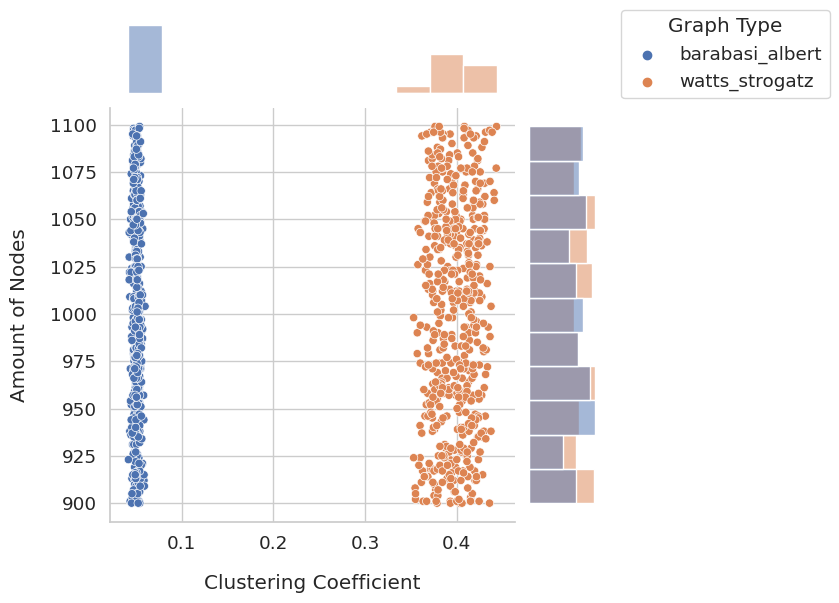

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g1 = sns.JointGrid(
    data=df_metrics, 
    # y="avg_degree_centrality", 
    # y="diameter", 
    x="average_clustering_coefficient", 
    y="n_nodes", 
    # y="n_edges", 
    hue="graph_type",
)
g1.plot(sns.scatterplot, sns.histplot)

# Customize the plot
g1.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g1.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g1.set_axis_labels("Clustering Coefficient", "Amount of Nodes", labelpad=15)
sns.move_legend(g1.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()

/tmp/ipykernel_3558186/1746551855.py:28: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


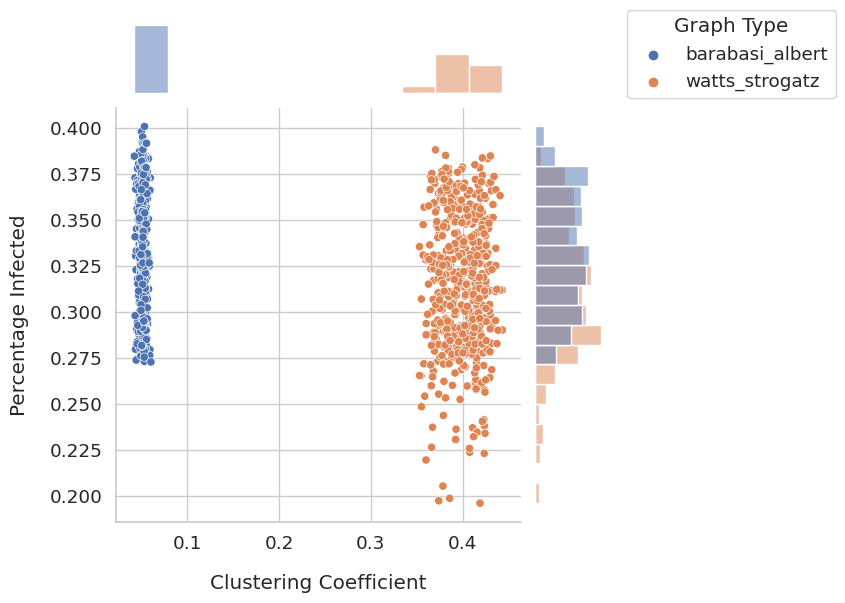

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Set the style
sns.set(style="whitegrid", font_scale=1.2)

# Create the plot where the data from every folder has to be plotted in a different color.
g = sns.JointGrid(
    data=df_metrics, 
    x="average_clustering_coefficient", 
    # x="avg_degree_centrality", 
    y="percentages_infected", 
    hue="graph_type",
)
g.plot(sns.scatterplot, sns.histplot)

# Customize the plot
g.ax_marg_x.set_axis_off()  # Hide x-axis marginal plot
g.ax_marg_y.set_axis_off()  # Hide y-axis marginal plot

# Set plot title and axis labels
g.set_axis_labels("Clustering Coefficient", "Percentage Infected", labelpad=15)
sns.move_legend(g.ax_joint, "lower right", title='Graph Type', bbox_to_anchor=(1.8, 1))

# Show the plot
plt.tight_layout()
plt.show()